In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import data
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

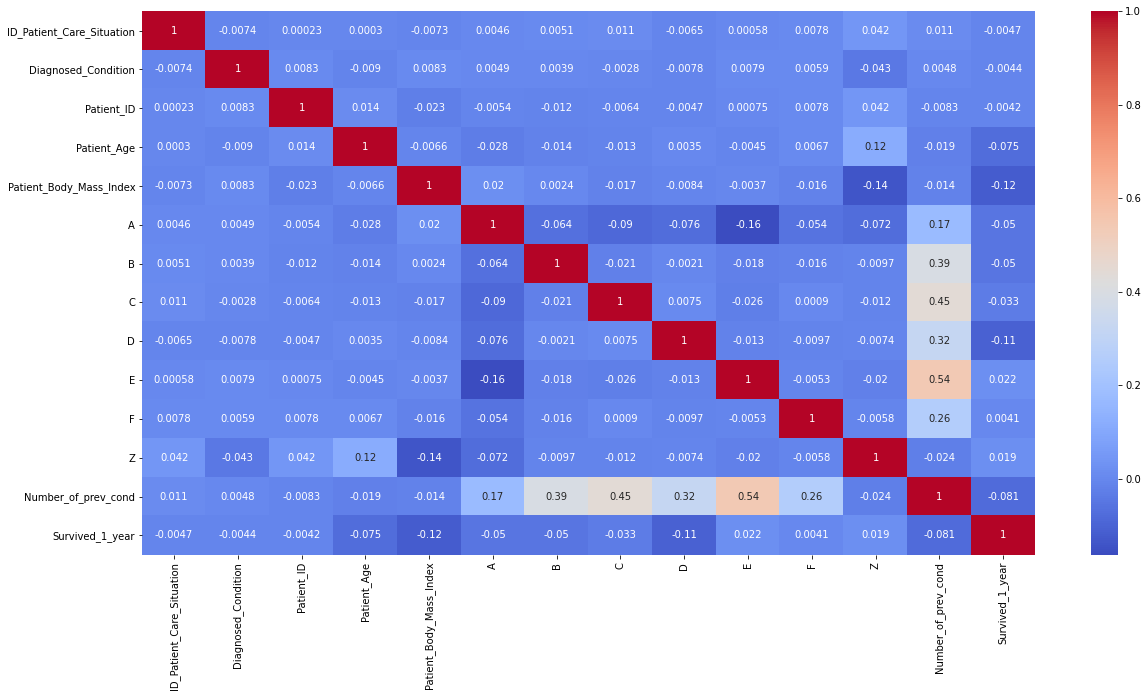

In [ ]:
#to see which variable has more correlation 
plt.figure(figsize=(20,10))
sns.heatmap(pharma_data.corr(),cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#check for missing values
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [ ]:
#function for calculating percentage of missing values in each column.
#This function accepts dataframe as argument.
def inititial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [ ]:
#running the abive function
inititial_eda_checks(pharma_data)

Total and Percentage of NaN:
                      Total   Percent
Z                     1235  0.053470
F                     1235  0.053470
E                     1235  0.053470
D                     1235  0.053470
C                     1235  0.053470
B                     1235  0.053470
A                     1235  0.053470
Number_of_prev_cond   1235  0.053470
Treated_with_drugs      13  0.000563


In [ ]:
inititial_eda_checks(test_data)

No NaN found.


In [ ]:
#replacing any empty values in a column using np.nan
pharma_data.replace('', np.nan, inplace=True)

In [ ]:
#function for imputing the numerical column values.
#this function will accept dataframe and missing columns in a list as an input.
from sklearn.impute import SimpleImputer 
def impute_missing_values(dataset_type,missing_columns):
    imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
    for i in missing_columns:
        imputer=imputer.fit(dataset_type[[i]])
        dataset_type[i]=imputer.transform(dataset_type[[i]])

In [ ]:
mis_col_names=['Z','F','E','D','C','B','A','Number_of_prev_cond']

In [ ]:
#calling the function for imputation.
impute_missing_values(pharma_data,mis_col_names)

In [ ]:
#this function will impute mode for missing values
#this function accepts dataframe and missing column names as list 
from sklearn.impute import SimpleImputer 
def impute_missing_values_categorical(dataset_type,missing_columns):
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    for i in missing_columns:
        imputer=imputer.fit(dataset_type[[i]])
        dataset_type[i]=imputer.transform(dataset_type[[i]])

In [ ]:
cat_mis_columns=['Treated_with_drugs']

In [ ]:
impute_missing_values_categorical(pharma_data,cat_mis_columns)

In [ ]:
#checking the misisng avlues after imputation
inititial_eda_checks(pharma_data)

No NaN found.


In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

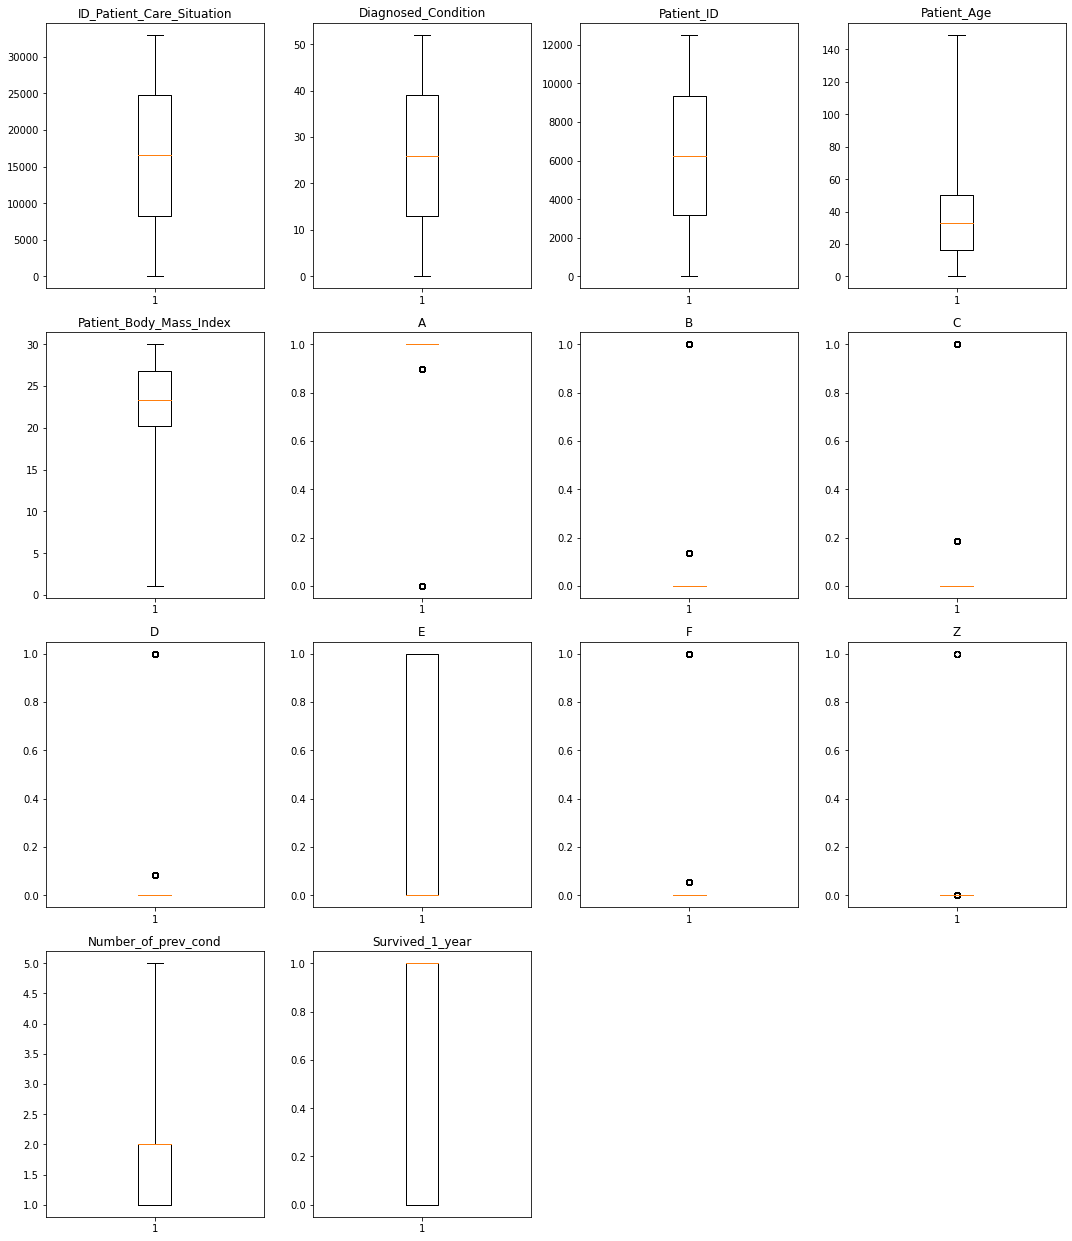

In [ ]:
#code for numerical column box plot 
continuous_labels = list(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'])
i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable
    plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
    plt.boxplot(pharma_data[var],whis=5)
    plt.title(var)
    i+=1
plt.tight_layout()
plt.show()


In [ ]:
pharma_data['Survived_1_year'].value_counts() 

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [ ]:
#dropping ID_Patient_Care_Situation and Patient_ID column
pharma_data = pharma_data.drop(['ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
#dropping ID_Patient_Care_Situation and Patient_ID column from test data
test_data = test_data.drop(['ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
#checking df after dropping columns
pharma_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
#Findings of EDA

    #The categorical features have a lot of unique values, we will be using cat_features (index of all categorical columns) instead of one hot encoding, but depending on the dataset it may be a good idea to adjust one_hot_max_size.

    #There are missing values in the dataset for few columns.

    #Used mean for numerical columns and mode for categorical columns.

    #Checked for class imbalance, but this dataset is pretty much balanced.



In [ ]:
#segregating X and y
X = pharma_data.drop(['Survived_1_year'],axis=1)
y = pharma_data['Survived_1_year']

In [ ]:
#splitting test and train datasets  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#I tried a model selection in a separate notebook, where i tried RFC and DTC which didnt perform well in unseen datasets.
#So opted to go on with Boosting models.
#Chose CatBoostClassifier especially since we will be having more categorical columns after one hot encoding.  
#But beauty of catboost is we no need to perform one hot encoding in a dataframe instead we can just pass the index of categorical columns in a raw data frame. 
#Comparatively very fast than the other boosting models.
#Catboost handles categorical values automatically without one hot encoding.

In [ ]:
# columns = list(pharma_data.columns)
# cat_features = np.where(pharma_data[columns].dtypes != np.float)[0]

In [ ]:
pharma_data.dtypes

Diagnosed_Condition           int64
Treated_with_drugs           object
Patient_Age                   int64
Patient_Body_Mass_Index     float64
Patient_Smoker               object
Patient_Rural_Urban          object
Patient_mental_condition     object
A                           float64
B                           float64
C                           float64
D                           float64
E                           float64
F                           float64
Z                           float64
Number_of_prev_cond         float64
Survived_1_year               int64
dtype: object

In [ ]:
#index of categorical columns in our pharma dataset
cat_features = [1,4,5,6]

In [ ]:
#install catboost
!pip install catboost

In [ ]:
#using catboost with some basic parameters.
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=1000,
                                 depth=6,
                                 eval_metric = 'F1',
                                 leaf_estimation_iterations = 10,
                                use_best_model=True
        )
        
clf.fit(x_train, 
        y_train,
        cat_features=cat_features,
        eval_set=(x_test, y_test)
)

y_pred = clf.predict(x_test)

0:	learn: 0.8186809	test: 0.8174722	best: 0.8174722 (0)	total: 81.3ms	remaining: 1m 21s
1:	learn: 0.8326332	test: 0.8313867	best: 0.8313867 (1)	total: 106ms	remaining: 52.9s
2:	learn: 0.8316654	test: 0.8298944	best: 0.8313867 (1)	total: 133ms	remaining: 44.2s
3:	learn: 0.8343464	test: 0.8329290	best: 0.8329290 (3)	total: 160ms	remaining: 39.8s
4:	learn: 0.8339931	test: 0.8343262	best: 0.8343262 (4)	total: 184ms	remaining: 36.7s
5:	learn: 0.8348791	test: 0.8323082	best: 0.8343262 (4)	total: 210ms	remaining: 34.8s
6:	learn: 0.8363224	test: 0.8336570	best: 0.8343262 (4)	total: 235ms	remaining: 33.3s
7:	learn: 0.8368096	test: 0.8352676	best: 0.8352676 (7)	total: 258ms	remaining: 32s
8:	learn: 0.8362641	test: 0.8327974	best: 0.8352676 (7)	total: 283ms	remaining: 31.2s
9:	learn: 0.8357608	test: 0.8342160	best: 0.8352676 (7)	total: 310ms	remaining: 30.7s
10:	learn: 0.8373579	test: 0.8347854	best: 0.8352676 (7)	total: 334ms	remaining: 30s
11:	learn: 0.8364869	test: 0.8340576	best: 0.8352676 (7

In [ ]:
#If we see eventhough without doing any fancy model tuning techniques, we are able to get good score of 87.5.
#Getting all the params used by catboost model
clf.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'F1',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.029999999329447743,
 'loss_function': 'Logloss',
 'max_ctr_complexity': 4,

In [ ]:
#computing confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 2599
True Negative 1282
False Positive 422
False Negative 317


In [ ]:
#computing f1 score
from sklearn.metrics import f1_score
acc = f1_score(y_test, y_pred)
acc

0.875526360114536

In [ ]:
#predicting on un seen data
prediction = clf.predict(test_data)

In [ ]:
#this is for printing all the prediction values in a cell so that we can just copy paste the results in submission
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#printing prediction results
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
#the above results gave a f1 score of 87.0439 on unseen data. That is the advantage of catboost. Without any tuning, it works well.
#But disadvantage is that this would be the maximum result the catboost can give. We can keep adjusting the learning rate but there would be very slight increase in f1 score. 

In [ ]:
#grid search for catboost classifier
params = {'depth':[4, 5, 6,7],
          'iterations':[250,300,500,1000],
              'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
              'l2_leaf_reg':[3,1,5,10,100],
               'border_count':[32,5,10,20,50,100,200],
              'bagging_temperature':[0.03,0.09,0.25,0.75],
               'random_strength':[0.2,0.5,0.8],
               'max_ctr_complexity':[1,2,3,4,5]
    }

In [ ]:
model = CatBoostClassifier(eval_metric = 'F1',cat_features=cat_features)
grid_search_result = model.grid_search(params,
                                        X=x_train,
                                        y=y_train,
                                        cv=10,
                                        partition_random_seed=3,
                                        stratified=True)
model.fit(x_train, 
        y_train,
        cat_features=cat_features,
        eval_set=(x_test, y_test)
)

y_pred = clf.predict(x_test)

In [ ]:
model.fit(x_train, 
                y_train,
                cat_features=cat_features,
                eval_set=(x_test, y_test))
        

0:	learn: 0.8152601	test: 0.8133268	best: 0.8133268 (0)	total: 19.6ms	remaining: 5.85s
1:	learn: 0.8168214	test: 0.8158188	best: 0.8158188 (1)	total: 40.4ms	remaining: 6.02s
2:	learn: 0.8164403	test: 0.8156017	best: 0.8158188 (1)	total: 58.3ms	remaining: 5.77s
3:	learn: 0.8164305	test: 0.8160938	best: 0.8160938 (3)	total: 76.2ms	remaining: 5.64s
4:	learn: 0.8182145	test: 0.8184135	best: 0.8184135 (4)	total: 93.3ms	remaining: 5.51s
5:	learn: 0.8208148	test: 0.8189711	best: 0.8189711 (5)	total: 108ms	remaining: 5.31s
6:	learn: 0.8205868	test: 0.8188220	best: 0.8189711 (5)	total: 126ms	remaining: 5.27s
7:	learn: 0.8239331	test: 0.8221471	best: 0.8221471 (7)	total: 144ms	remaining: 5.26s
8:	learn: 0.8245806	test: 0.8223154	best: 0.8223154 (8)	total: 164ms	remaining: 5.29s
9:	learn: 0.8269013	test: 0.8270968	best: 0.8270968 (9)	total: 180ms	remaining: 5.23s
10:	learn: 0.8313355	test: 0.8294099	best: 0.8294099 (10)	total: 200ms	remaining: 5.26s
11:	learn: 0.8340782	test: 0.8345138	best: 0.83

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.get_all_params() 

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 4,
 'eval_metric': 'F1',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 300,
 'l2_leaf_reg': 10,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.10000000149011612,
 'loss_function': 'Logloss',
 'max_ctr_complexity': 4,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 2597
True Negative 1259
False Positive 445
False Negative 319


In [ ]:
acc = f1_score(y_test, y_pred)
acc

0.8717690500167841

In [ ]:
prediction = model.predict(test_data)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
#the above prediction results after grid search of catboost didnt improve the f1 score.

In [ ]:
params = {'depth':[4, 5, 6,7],
          'iterations':[300,500],
              'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
              'l2_leaf_reg':[3,1,5,10,100]
               'border_count':[32,5,10,20,50,100,200],
               'bagging_temperature':[0.03,0.09,0.25,0.75],
               'random_strength':[0.2,0.5,0.8],
               'max_ctr_complexity':[1,2,3,4,5]
    }

In [ ]:
#param tuning using randomized search for catboost
from sklearn.model_selection import RandomizedSearchCV
model = CatBoostClassifier(cat_features=cat_features)
randm = RandomizedSearchCV(estimator=model, param_distributions = params, 
                               cv = 10, n_iter = 10, n_jobs=-1,scoring="f1")
randm.fit(x_train, y_train)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")

0:	learn: 0.6788057	total: 23.9ms	remaining: 11.9s
1:	learn: 0.6664275	total: 43.2ms	remaining: 10.8s
2:	learn: 0.6544476	total: 61.1ms	remaining: 10.1s
3:	learn: 0.6431007	total: 81.9ms	remaining: 10.2s
4:	learn: 0.6329458	total: 102ms	remaining: 10.1s
5:	learn: 0.6205738	total: 130ms	remaining: 10.7s
6:	learn: 0.6112713	total: 161ms	remaining: 11.3s
7:	learn: 0.6023362	total: 182ms	remaining: 11.2s
8:	learn: 0.5942268	total: 204ms	remaining: 11.2s
9:	learn: 0.5847444	total: 225ms	remaining: 11s
10:	learn: 0.5774389	total: 247ms	remaining: 11s
11:	learn: 0.5704393	total: 266ms	remaining: 10.8s
12:	learn: 0.5646737	total: 287ms	remaining: 10.8s
13:	learn: 0.5588776	total: 305ms	remaining: 10.6s
14:	learn: 0.5535927	total: 327ms	remaining: 10.6s
15:	learn: 0.5485174	total: 344ms	remaining: 10.4s
16:	learn: 0.5435889	total: 366ms	remaining: 10.4s
17:	learn: 0.5374126	total: 389ms	remaining: 10.4s
18:	learn: 0.5330622	total: 409ms	remaining: 10.4s
19:	learn: 0.5280851	total: 434ms	remaini

In [ ]:
#using the best params from the randomised search
tuned_model_2 = CatBoostClassifier(iterations=500,
                                depth=5,
                                random_seed=42,
                                learning_rate=0.03,
                                eval_metric = 'F1',
                                l2_leaf_reg= 3,
                                leaf_estimation_iterations = 10,
                                use_best_model=True)
tuned_model_2.fit(x_train, 
        y_train,
        cat_features=cat_features,
        eval_set=(x_test, y_test)
)

y_pred = tuned_model_2.predict(x_test)

0:	learn: 0.8205952	test: 0.8201761	best: 0.8201761 (0)	total: 24.1ms	remaining: 12s
1:	learn: 0.8228772	test: 0.8212299	best: 0.8212299 (1)	total: 44.3ms	remaining: 11s
2:	learn: 0.8282484	test: 0.8267131	best: 0.8267131 (2)	total: 67.2ms	remaining: 11.1s
3:	learn: 0.8232009	test: 0.8207577	best: 0.8267131 (2)	total: 90ms	remaining: 11.2s
4:	learn: 0.8293112	test: 0.8284800	best: 0.8284800 (4)	total: 110ms	remaining: 10.8s
5:	learn: 0.8283240	test: 0.8257056	best: 0.8284800 (4)	total: 131ms	remaining: 10.8s
6:	learn: 0.8298653	test: 0.8265436	best: 0.8284800 (4)	total: 152ms	remaining: 10.7s
7:	learn: 0.8300200	test: 0.8271801	best: 0.8284800 (4)	total: 173ms	remaining: 10.6s
8:	learn: 0.8287748	test: 0.8259342	best: 0.8284800 (4)	total: 194ms	remaining: 10.6s
9:	learn: 0.8300878	test: 0.8274104	best: 0.8284800 (4)	total: 217ms	remaining: 10.6s
10:	learn: 0.8300443	test: 0.8278610	best: 0.8284800 (4)	total: 238ms	remaining: 10.6s
11:	learn: 0.8298000	test: 0.8267136	best: 0.8284800 (4

In [ ]:
prediction=tuned_model_2.predict(test_data)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
#the above prediction result gave f1 score of 86.8 on unseen data
#i could not further improve the f1 score using catboost.

In [ ]:
#Going to experiment with lightgbm which is the next good boosting model used across.
#we need to do one hot encoding in this unlike the catboost
#performing one hot encoding and saving in a different variable
pharma_data_one_hot = pd.get_dummies(pharma_data)
pharma_data_one_hot=pharma_data_one_hot.drop(['Patient_Smoker_Cannot say'],axis=1)

In [ ]:
#performing one hot encoding in un seen data
test_data_one_hot = pd.get_dummies(test_data)

In [ ]:
#separating x and y after one hot encoding
X_mod = pharma_data_one_hot.drop(['Survived_1_year'],axis=1)
y_mod = pharma_data_one_hot['Survived_1_year']

In [ ]:
#separating test and train data
from sklearn.model_selection import train_test_split
x_train_mod, x_test_mod, y_train_mod, y_test_mod = train_test_split(X_mod,y_mod,test_size=0.20,random_state=42)

In [ ]:
#trying lightgbm with basic params
from lightgbm import LGBMClassifier
model = LGBMClassifier(iterations=1000,
                                 depth=6,
                                 eval_metric = 'F1',
                                 leaf_estimation_iterations = 10,
                                use_best_model=True)
model.fit(x_train_mod,y_train_mod)
y_pred_mod=model.predict(x_test_mod)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
tn, fp, fn, tp = confusion_matrix(y_test_mod, y_pred_mod).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 2561
True Negative 1288
False Positive 416
False Negative 355


In [ ]:
acc= f1_score(y_test_mod,y_pred_mod)
acc

0.86916680807738

In [ ]:
prediction=model.predict(test_data_one_hot)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
#the above prediction result gave f1 score of 86.98 on unseen data . Thats not bad.
#going to perform grid search for lightgbm classifier

In [ ]:
#params array for grid search. i am going to mainly focus on learning rate, n_estimators, num_leaves and max_bin 
params ={
            'learning_rate': [0.005, 0.003,0.002,0.001,0.03,0.02,0.01,0.3,0.2,0.1,1],
            'n_estimators': [100,500,700,1000],
            'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
            'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
            'objective' : ['binary'],
            'max_bin':[255, 510] # large max_bin helps improve accuracy but might slow down training progress
            # 'random_state' : [500],
            # 'colsample_bytree' : [0.64, 0.65, 0.66],
            # 'subsample' : [0.7,0.75],
            # 'reg_alpha' : [1,1.2],
            # 'reg_lambda' : [1,1.2,1.4]
             }



In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
clf = lgb.LGBMClassifier(metric='f1')
gs = GridSearchCV(
    clf, params, verbose=1, cv=4, n_jobs=-1)
gs.fit(x_train_mod,y_train_mod)
# Results from Random Search
print("\n The best score across ALL searched params:\n",
      gs.best_score_)
print("\n The best parameters across ALL searched params:\n",
      gs.best_params_)
print("\n ========================================================")

Fitting 4 folds for each of 704 candidates, totalling 2816 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 159.3min
[Parallel(n_jobs=-1)]: Done 2816 out of 2816 | elapsed: 202.5min finished



 The best score across ALL searched params:
 0.8419655568145501

 The best parameters across ALL searched params:
 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 255, 'n_estimators': 500, 'num_leaves': 6, 'objective': 'binary'}



In [ ]:
#using the best params given b
from lightgbm import LGBMClassifier
model = LGBMClassifier(iterations=1000,
                                 depth=6,
                                 eval_metric = 'F1',
                                 leaf_estimation_iterations = 10,
                                 learning_rate= 0.1, 
                                 max_bin= 255, 
                                 n_estimators= 500, 
                                 num_leaves= 6,
                                use_best_model=True)
model.fit(x_train_mod,y_train_mod)
y_pred_mod=model.predict(x_test_mod)

In [ ]:
prediction=model.predict(test_data_one_hot)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
#the above prediction results gave f1 score of 87.27

In [146]:
#adjusting various params especially max_bin, num_leaves and n_estimators which is important for model improvisation in lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(iterations=1000,
                                 depth=6,
                                 eval_metric = 'F1',
                                 leaf_estimation_iterations = 10,
                                 learning_rate= 0.1, 
                                 max_bin= 255, 
                                 n_estimators= 555, 
                                 num_leaves= 6,
                                use_best_model=True)
model.fit(x_train_mod,y_train_mod,eval_set=(x_test_mod,y_test_mod))
y_pred_mod=model.predict(x_test_mod)

[1]	valid_0's binary_logloss: 0.635895
[2]	valid_0's binary_logloss: 0.617876
[3]	valid_0's binary_logloss: 0.603026
[4]	valid_0's binary_logloss: 0.5901
[5]	valid_0's binary_logloss: 0.579429
[6]	valid_0's binary_logloss: 0.569517
[7]	valid_0's binary_logloss: 0.561376
[8]	valid_0's binary_logloss: 0.552918
[9]	valid_0's binary_logloss: 0.54584
[10]	valid_0's binary_logloss: 0.540017
[11]	valid_0's binary_logloss: 0.532967
[12]	valid_0's binary_logloss: 0.523222
[13]	valid_0's binary_logloss: 0.517731
[14]	valid_0's binary_logloss: 0.509832
[15]	valid_0's binary_logloss: 0.503388
[16]	valid_0's binary_logloss: 0.499074
[17]	valid_0's binary_logloss: 0.492247
[18]	valid_0's binary_logloss: 0.48696
[19]	valid_0's binary_logloss: 0.483179
[20]	valid_0's binary_logloss: 0.477768
[21]	valid_0's binary_logloss: 0.473635
[22]	valid_0's binary_logloss: 0.469863
[23]	valid_0's binary_logloss: 0.465006
[24]	valid_0's binary_logloss: 0.461856
[25]	valid_0's binary_logloss: 0.459021
[26]	valid_0'

In [147]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_mod, y_pred_mod).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 2592
True Negative 1291
False Positive 413
False Negative 324


In [148]:
acc= f1_score(y_test_mod,y_pred_mod)
acc

0.8755277824691775

In [149]:
prediction=model.predict(test_data_one_hot)

In [150]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
#the above prediction results gave an f1 score of 87.411934 on unseeen data